In [ ]:
'''
Need to find
1) DiD for Feb to Nov
2) DiD for dec, jan, feb to nov,dec,jan
3) Event Study
'''

In [3]:
import pandas as pd
import numpy as np
import requests
import json

In [4]:
mar_2021 = 'https://api.census.gov/data/2021/cps/basic/mar?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
feb_2021 = 'https://api.census.gov/data/2021/cps/basic/feb?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
jan_2021 = 'https://api.census.gov/data/2021/cps/basic/jan?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
dec_2020 = 'https://api.census.gov/data/2020/cps/basic/dec?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
nov_2020 = 'https://api.census.gov/data/2020/cps/basic/nov?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
oct_2020 = 'https://api.census.gov/data/2020/cps/basic/oct?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
sep_2020 = 'https://api.census.gov/data/2020/cps/basic/sep?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
aug_2020 = 'https://api.census.gov/data/2020/cps/basic/aug?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
jul_2020 = 'https://api.census.gov/data/2020/cps/basic/jul?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
jun_2020 = 'https://api.census.gov/data/2020/cps/basic/jun?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
may_2020 = 'https://api.census.gov/data/2020/cps/basic/may?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
apr_2020 = 'https://api.census.gov/data/2020/cps/basic/apr?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
mar_2020 = 'https://api.census.gov/data/2020/cps/basic/mar?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
feb_2020 = 'https://api.census.gov/data/2020/cps/basic/feb?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
jan_2020 = 'https://api.census.gov/data/2020/cps/basic/jan?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
dec_2019 = 'https://api.census.gov/data/2019/cps/basic/dec?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
nov_2019 = 'https://api.census.gov/data/2019/cps/basic/nov?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
oct_2019 = 'https://api.census.gov/data/2019/cps/basic/oct?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
sep_2019 = 'https://api.census.gov/data/2019/cps/basic/sep?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
aug_2019 = 'https://api.census.gov/data/2019/cps/basic/aug?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
jul_2019 = 'https://api.census.gov/data/2019/cps/basic/jul?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
jun_2019 ='https://api.census.gov/data/2019/cps/basic/jun?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
may_2019 = 'https://api.census.gov/data/2019/cps/basic/may?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
apr_2019 = 'https://api.census.gov/data/2019/cps/basic/apr?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
mar_2019 = 'https://api.census.gov/data/2019/cps/basic/mar?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
feb_2019 = 'https://api.census.gov/data/2019/cps/basic/feb?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
jan_2019 ='https://api.census.gov/data/2019/cps/basic/jan?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
dec_2018 ='https://api.census.gov/data/2018/cps/basic/dec?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
nov_2018 = 'https://api.census.gov/data/2018/cps/basic/nov?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
oct_2018 ='https://api.census.gov/data/2018/cps/basic/oct?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
sep_2018 = 'https://api.census.gov/data/2018/cps/basic/sep?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
aug_2018 = 'https://api.census.gov/data/2018/cps/basic/aug?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
jul_2018 ='https://api.census.gov/data/2018/cps/basic/jul?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
jun_2018 ='https://api.census.gov/data/2018/cps/basic/jun?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
may_2018 = 'https://api.census.gov/data/2018/cps/basic/may?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
apr_2018 ='https://api.census.gov/data/2018/cps/basic/apr?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
mar_2018 ='https://api.census.gov/data/2018/cps/basic/mar?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
feb_2018 ='https://api.census.gov/data/2018/cps/basic/feb?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'
jan_2018 ='https://api.census.gov/data/2018/cps/basic/jan?get=PWSSWGT,PWCMPWGT,PESEX,PEMARITL,PEEDUCA,PTDTRACE,PRCITSHP,PREXPLF,HEFAMINC,PEHSPNON,PRTAGE&ucgid=0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56'

In [5]:
req_list = [jan_2018,feb_2018,mar_2018,apr_2018,may_2018,
            jun_2018,jul_2018,aug_2018,sep_2018,oct_2018,
            nov_2018,dec_2018,jan_2019,feb_2019,mar_2019,
            apr_2019,may_2019,jun_2019,jul_2019,aug_2019,
            sep_2019,oct_2019,nov_2019,dec_2019,
            jan_2020, feb_2020, mar_2020, apr_2020, may_2020,
            jun_2020, jul_2020, aug_2020, sep_2020, oct_2020,
            nov_2020, dec_2020, jan_2021, feb_2021, mar_2021]
names= ['jan_2018','feb_2018','mar_2018','apr_2018','may_2018',
            'jun_2018','jul_2018','aug_2018','sep_2018','oct_2018',
            'nov_2018','dec_2018','jan_2019','feb_2019','mar_2019',
            'apr_2019','may_2019','jun_2019','jul_2019','aug_2019',
            'sep_2019','oct_2019','nov_2019','dec_2019',
            'jan_2020', 'feb_2020', 'mar_2020', 'apr_2020', 'may_2020',
            'jun_2020', 'jul_2020', 'aug_2020', 'sep_2020', 'oct_2020',
            'nov_2020', 'dec_2020', 'jan_2021', 'feb_2021', 'mar_2021']
short_names=['1/18','2/18','3/18','4/18','5/18','6/18','7/18','8/18',
            '9/18','10/18','11/18','12/18','1/19','2/19','3/19','4/19',
            '5/19','6/19','7/19','8/19','9/19','10/19','11/19','12/19',
             '1/20','2/20','3/20','4/20','5/20','6/20','7/20','8/20',
             '9/20','10/20','11/20','12/20','1/21','2/21','3/21']

In [6]:
#Columns for the Dataframe
states = ['AL','AK','AZ','AR','CA','CO','CT','DE',
         'DC','FL','GA','HI','ID','IL','IN','IA','KA',
         'KY','LA','ME','MD','MA','MI','MN','MS','MO',
         'MT','NE','NV','NH','NJ','NM','NY','NC','ND',
         'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT',
         'VT','VA','WA','WV','WI','WY']
states_dict = {
        '1':1,'2':2,'4':3,'5':4,'6':5,'8':6,'9':7,
        '10':8,'11':9,'12':10,'13':11,'15':12,'16':13,'17':14,
        '18':15,'19':16,'20':17,'21':18,'22':19,'23':20,'24':21,
        '25':22,'26':23,'27':24,'28':25,'29':26,'30':27,'31':28,
        '32':29,'33':30,'34':31,'35':32,'36':33,'37':34,'38':35,
        '39':36,'40':37,'41':38,'42':39,'44':40,'45':41,'46':42,
        '47':43,'48':44,'49':45,'50':46,'51':47,'53':48, '54':49,
        '55':50,'56':51
}
m_status = ['Married_Spouse_Present', 'Married_Spouse_Absent',
            'Widowed','Divorced','Separated','Never_Married']
education = ['No_Diploma','High_school','Some_college','Associates','Bachelors','Masters','PhD']
race = ['White','Black','HP','Asian','American_Indian']
citizenship = ['Native_Citizen','Naturalized_Citizen','Non_Citizen']

In [7]:
from sklearn.preprocessing import LabelBinarizer
def one_hot_encode(df,columns, col_name):
    y = LabelBinarizer().fit_transform(df[col_name])
    one_hot = pd.DataFrame(index=df.index,data=y,columns=columns)
    return one_hot

In [8]:
def drop_out_of_universe(df):
    df = df[df.PESEX != '-1']
    df = df[df.PEMARITL != '-1']
    #Removing pre-high school values
    '''
    1 - no high school diploma
    2-high school grad
    3 - Some college
    4 - Associates degree
    5 - Bachelor's
    6 - Master's
    7 - PHD or professional school
    '''
    bad_educ_vals = ['31','32','33','34','35','36','37'] #replace these with -1
    df['PEEDUCA'] = df['PEEDUCA'].replace(bad_educ_vals,'-1')
    df['PEEDUCA'] = df['PEEDUCA'].replace(['38','39','40','41','42','43','44','45','46'],[1,2,3,4,4,5,6,7,7])
    df = df[df.PEEDUCA != '-1']
    df = df[df.PEEDUCA != -1]
    bad_race_values = ['26','25','24','23','22','21','20','19','18','17',
                      '16','10','5','13','14','15']
    df['PTDTRACE'] = df['PTDTRACE'].replace(bad_race_values,-1)
    '''
    White = 1
    Black = 2
    Non-white hispanic = 3
    Asian = 4
    AI = 5
    '''
    df['PTDTRACE'] = df['PTDTRACE'].replace(['1','2','3','4','6','7','8','9','10','11','12'],[1,2,5,4,2,5,4,1,2,2,3])
    df = df[df.PTDTRACE != '-1']
    df = df[df.PTDTRACE != -1]
    #Change everyone labeled hispanic to hispanic in PTDTRACE
    df.loc[df.PEHSPNON == '1', 'PTDTRACE'] = 3 
    df['PRCITSHP'] = df['PRCITSHP'].replace(['1','2','3','4','5'],[1,1,1,2,3])
    df = df[df.PRCITSHP != '-1']
    df = df[df.PREXPLF != '-1']
    df['PRTAGE'] = pd.to_numeric(df['PRTAGE'])
    df = df[df['PRTAGE'] >=16]
    df['STATE'] = df['STATE'].replace(states_dict)
    df = df.drop(columns=['PWSSWGT','PWMCMPWGT','PEHSPNON'])
    return df

In [9]:
cols = ['PWSSWGT','PWMCMPWGT','PESEX','PEMARITL','PEEDUCA',
        'PTDTRACE','PRCITSHP','PREXPLF','HEFAMINC', 'PEHSPNON','PRTAGE','STATE']

In [10]:
df_list = []
for i in range(len(req_list)):
    print("Iteration: ", i, " Date: ", names[i])
    #Begin the one_hot_encoding process
    request = req_list[i]
    response = requests.get(request)
    name = names[i] +".csv"
    query = json.loads(response.text)[1:]
    df = pd.DataFrame(columns=cols, data=query)
    #Drop out of universe values
    df = drop_out_of_universe(df)
    #PESEX
    pesex_one = pd.to_numeric(df['PESEX']) - 1
    #PEMARITL
    premaritl_one = one_hot_encode(df,m_status,'PEMARITL')
    peeduca_one = df['PEEDUCA']
    #PTDTRACE
    ptdtrace_one = one_hot_encode(df, race, 'PTDTRACE')
    #PRCITSHP
    prcitshp_one = one_hot_encode(df,citizenship,'PRCITSHP')
    #PREEXPLF - already one hot encoded
    preexplf_one = pd.to_numeric(df['PREXPLF']) - 1
    #HEFAMINC - income level
    hefaminc = pd.to_numeric(df['HEFAMINC'])
    #Age
    age = pd.to_numeric(df['PRTAGE'])
    #STATE
    states_one = one_hot_encode(df,states,'STATE')
    #Create the one hot encoded dataframe!
    result = pd.concat([preexplf_one, hefaminc, pesex_one,peeduca_one, premaritl_one,ptdtrace_one,
                       prcitshp_one,age,states_one],axis=1)
    #Add it to the df_list
    df_list.append(result)

Iteration:  0  Date:  jan_2018
Iteration:  1  Date:  feb_2018
Iteration:  2  Date:  mar_2018
Iteration:  3  Date:  apr_2018
Iteration:  4  Date:  may_2018
Iteration:  5  Date:  jun_2018
Iteration:  6  Date:  jul_2018
Iteration:  7  Date:  aug_2018
Iteration:  8  Date:  sep_2018
Iteration:  9  Date:  oct_2018
Iteration:  10  Date:  nov_2018
Iteration:  11  Date:  dec_2018
Iteration:  12  Date:  jan_2019
Iteration:  13  Date:  feb_2019
Iteration:  14  Date:  mar_2019
Iteration:  15  Date:  apr_2019
Iteration:  16  Date:  may_2019
Iteration:  17  Date:  jun_2019
Iteration:  18  Date:  jul_2019
Iteration:  19  Date:  aug_2019
Iteration:  20  Date:  sep_2019
Iteration:  21  Date:  oct_2019
Iteration:  22  Date:  nov_2019
Iteration:  23  Date:  dec_2019
Iteration:  24  Date:  jan_2020
Iteration:  25  Date:  feb_2020
Iteration:  26  Date:  mar_2020
Iteration:  27  Date:  apr_2020
Iteration:  28  Date:  may_2020
Iteration:  29  Date:  jun_2020
Iteration:  30  Date:  jul_2020
Iteration:  31  Da

In [196]:
'''
DiD for a single time period - Feb to March
'''

'\nDiD for a single time period - Feb to March\n'

In [197]:
df = df_list[25]
df_ia = df[df['IA']==1]
df_mn = df[df['MN']==1]
df = pd.concat([df_ia,df_mn],axis=0)
df = df[['PREXPLF','MN','PEEDUCA']]
df = df.assign(POST=0)
df_pre = df
df_post = df_list[-1]
df_ia=df_post[df_post['IA']==1]
df_mn=df_post[df_post['MN']==1]
df_post = pd.concat([df_ia,df_mn],axis=0)
df_post = df_post[['PREXPLF','MN','PEEDUCA']]
df_post = df_post.assign(POST=1)
df_combined = pd.concat([df,df_post],axis=0).reset_index()
df_combined['NO_COLLEGE'] = df_combined['PEEDUCA'].isin([1,2]).astype('int32')
df_combined = df_combined.drop(columns=['PEEDUCA','index'])
df_combined['Interact'] = df_combined['MN']*df_combined['POST']
#Separate into no control and control
df_none = df_combined.drop(columns=['NO_COLLEGE'])
df_control = df_combined[df_combined['NO_COLLEGE']==1]
df_control = df_control.drop(columns=['NO_COLLEGE'])
df_control

,PREXPLF,MN,POST,Interact
3,0,0,0,0
10,0,0,0,0
11,0,0,0,0
24,0,0,0,0
25,0,0,0,0
...,...,...,...,...
2852,0,1,1,1
2857,0,1,1,1
2858,1,1,1,1
2859,0,1,1,1


In [198]:
'''
DiD for Feb -> March
NO CONTROL
'''
import numpy as np
import statsmodels.api as sm
X = df_none[['MN','POST','Interact']]
X2 = sm.add_constant(X)
model=sm.OLS(df_none['PREXPLF'],X2)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                PREXPLF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.002
Date:                Tue, 27 Apr 2021   Prob (F-statistic):              0.391
Time:                        19:27:28   Log-Likelihood:                 798.71
No. Observations:                2872   AIC:                            -1589.
Df Residuals:                    2868   BIC:                            -1566.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0305      0.007      4.363      0.0

In [199]:
'''
DiD for Feb -> March, ONLY NON-COLLEGE EDUCATED
'''
X = df_control[['MN','POST','Interact']]
X2=sm.add_constant(X)
model_c=sm.OLS(df_control['PREXPLF'],X2)
results_c = model_c.fit()
print(results_c.summary())

                            OLS Regression Results                            
Dep. Variable:                PREXPLF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9742
Date:                Tue, 27 Apr 2021   Prob (F-statistic):              0.404
Time:                        19:27:29   Log-Likelihood:                 86.100
No. Observations:                 736   AIC:                            -164.2
Df Residuals:                     732   BIC:                            -145.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.015      3.809      0.0

In [200]:
#END OF FIRST SET OF RESULTS

In [201]:
'''
Pooled OLS
'''
df = pd.concat([df_list[25],df_list[26],df_list[27]],axis=0)
df_ia = df[df['IA']==1]
df_mn = df[df['MN']==1]
df = pd.concat([df_ia,df_mn],axis=0).reset_index().drop(columns=['index'])
df = df[['PREXPLF','MN','PEEDUCA']]
df_pre = df
df_pre['POST'] = 0
##Now do post df
df = pd.concat([df_list[-1],df_list[-2],df_list[-3]],axis=0)
df_ia = df[df['IA']==1]
df_mn = df[df['MN']==1]
df = pd.concat([df_ia,df_mn],axis=0).reset_index().drop(columns=['index'])
df = df[['PREXPLF','MN','PEEDUCA']]
df_post = df
df_post['POST'] = 1
#
df_combined = pd.concat([df_pre,df_post],axis=0)
df_combined['Interact'] = df_combined['MN']*df_combined['POST']
df_none = df_combined.drop(columns=['PEEDUCA'])
df_control = df_combined[df_combined['PEEDUCA'].isin([1,2])]

In [202]:
'''
DiD for Dec,Jan,Feb -> Jan,Feb,March
No Control
'''
X = df_none[['MN','POST','Interact']]
X2 = sm.add_constant(X)
model=sm.OLS(df_none['PREXPLF'],X2)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                PREXPLF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.965
Date:                Tue, 27 Apr 2021   Prob (F-statistic):             0.0308
Time:                        19:27:29   Log-Likelihood:                 1103.6
No. Observations:                8427   AIC:                            -2199.
Df Residuals:                    8423   BIC:                            -2171.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0545      0.005     11.377      0.0

In [203]:
'''
DiD for Dec,Jan,Feb -> Jan,Feb,March
CONTROL
'''
X = df_control[['MN','POST','Interact']]
X2 = sm.add_constant(X)
model=sm.OLS(df_control['PREXPLF'],X2)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                PREXPLF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.159
Date:                Tue, 27 Apr 2021   Prob (F-statistic):             0.0910
Time:                        19:27:29   Log-Likelihood:                 27.962
No. Observations:                2182   AIC:                            -47.92
Df Residuals:                    2178   BIC:                            -25.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0691      0.010      7.124      0.0

In [204]:
'''
Event Study
'''

'\nEvent Study\n'

In [205]:
#Organize data for pre-covid
no_college = [1,2]
pre_df = pd.DataFrame()
pre_df_control = pd.DataFrame()
for i in range(14,26):
    df = df_list[i]
    df_ia = df[df['IA']==1]
    df_mn = df[df['MN']==1]
    temp = pd.concat([df_ia,df_mn],axis=0)
    temp = temp.reset_index()
    temp_control = temp[['PREXPLF','PEEDUCA','MN']]
    temp_control = temp_control[temp_control.PEEDUCA.isin(no_college)]
    temp = temp[['PREXPLF','MN']]
    temp['DATE'] = i
    temp_control['DATE'] = i
    pre_df = pd.concat([pre_df,temp])
    pre_df_control = pd.concat([pre_df_control,temp_control])
    
pre_df['POST'] = 0
pre_df_control['POST'] = 0
#One hot encode date variable
dates = one_hot_encode(pre_df,[14,15,16,17,18,19,20,21,22,23,24,25],'DATE')
dates_control = one_hot_encode(pre_df_control,[14,15,16,17,18,19,20,21,22,23,24,25],'DATE')
pre_df = pre_df.drop(columns=['DATE'])
pre_df = pd.concat([pre_df,dates],axis=1)
pre_df_control = pre_df_control.drop(columns=['DATE'])
pre_df_control = pd.concat([pre_df_control,dates_control],axis=1)
for i in range(26,39):
    pre_df[i] = 0
    pre_df_control[i] = 0
#pre_df
#pre_df_control
pre_df

,PREXPLF,MN,POST,14,15,16,17,18,19,20,...,29,30,31,32,33,34,35,36,37,38
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1534,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1535,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
#Organize Data for Post Covid
post_df = pd.DataFrame()
post_df_control = pd.DataFrame()
for i in range(26,39):
    df = df_list[i]
    df_ia = df[df['IA']==1]
    df_mn = df[df['MN']==1]
    temp = pd.concat([df_ia,df_mn],axis=0)
    temp = temp.reset_index()
    temp_control = temp[['PREXPLF','PEEDUCA','MN']]
    temp_control = temp_control[temp_control.PEEDUCA.isin(no_college)]
    temp = temp[['PREXPLF','MN']]
    temp['DATE'] = i
    temp_control['DATE'] = i
    post_df = pd.concat([post_df,temp])
    post_df_control = pd.concat([post_df_control,temp_control])


post_df['POST'] = 1
post_df_control['POST'] = 1 
#One hot encode
dates = one_hot_encode(post_df,[26,27,28,29,30,31,32,33,34,35,36,37,38],'DATE')
dates_control = one_hot_encode(post_df_control,[26,27,28,29,30,31,32,33,34,35,36,37,38],'DATE')
post_df = post_df.drop(columns=['DATE'])
post_df_control = post_df_control.drop(columns=['DATE'])
post_df_control = pd.concat([post_df_control,dates_control],axis=1)
post_df = pd.concat([post_df,dates],axis=1)
for i in range(14,26):
    post_df[i] = 0
    post_df_control[i] = 0

In [207]:
combined_df.columns

Index(['PREXPLF',      'MN',    'POST',        14,        15,        16,
              17,        18,        19,        20,        21,        22,
              23,        24,        25,        26,        27,        28,
              29,        30,        31,        32,        33,        34,
              35,        36,        37,        38,     '26i',     '27i',
           '28i',     '29i',     '30i',     '31i',     '32i',     '33i',
           '34i',     '35i',     '36i',     '37i',     '38i'],
      dtype='object')

In [208]:
#Combine the two dataframes - add interaction term
combined_df = pd.concat([pre_df,post_df],axis=0)
combined_df_c = pd.concat([pre_df_control,post_df_control],axis=0)
X_restricted = combined_df.drop(columns=['PREXPLF'])
X_restricted_c = combined_df_c.drop(columns=['PREXPLF'])
for i in range(26,39):
    i_str=str(i)
    combined_df[i_str+'i']=combined_df[i]*combined_df['MN']
    combined_df_c[i_str+'i']=combined_df_c[i]*combined_df_c['MN']

In [214]:
'''
Event Study - No control
'''
X = combined_df.drop(columns=['PREXPLF',38,'38i'])
X = X.drop(columns=[14,15,16,17,18,19])
X = sm.add_constant(X)
restricted_model = sm.OLS(combined_df['PREXPLF'],X_restricted)
restricted_fit = restricted_model.fit()
model=sm.OLS(combined_df['PREXPLF'],X)
results=model.fit()
#print(results.summary())
print(results.compare_f_test(restricted_fit))
print(results.summary())

(2.433412060927347, 0.017197023120935382, 7.0)
                            OLS Regression Results                            
Dep. Variable:                PREXPLF   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     12.24
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           4.43e-63
Time:                        22:15:16   Log-Likelihood:                 8096.7
No. Observations:               36254   AIC:                        -1.613e+04
Df Residuals:                   36221   BIC:                        -1.585e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

Text(0.5, 1.0, 'Interaction Term Coefficients')

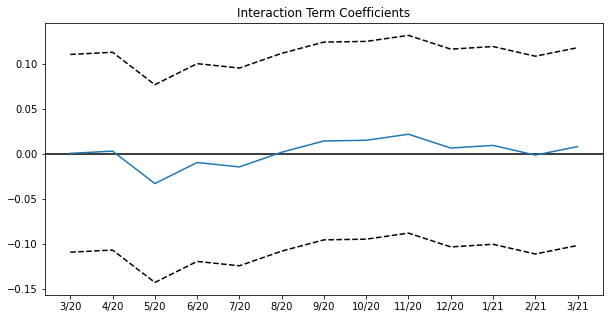

In [210]:
#Graph the Coefficients
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
x = results.params[-13:]
x_plus = x+.11
x_min = x-.11
y = short_names[-13:]
plt.axhline(y=0,c='black')
plt.plot(y,x)
plt.plot(y,x_plus,'--',c='black')
plt.plot(y,x_min,'--',c='black')
plt.title("Interaction Term Coefficients")

In [211]:
'''
Event Study - Control
'''
X = combined_df_c.drop(columns=['PREXPLF','PEEDUCA'])
X = X.drop(columns=[14,15,16,17,18,19])
X = sm.add_constant(X)
restricted_model = sm.OLS(combined_df_c['PREXPLF'],X_restricted_c)
restricted_fit = restricted_model.fit()
model=sm.OLS(combined_df_c['PREXPLF'],X)
results=model.fit()
print(results.summary())
results.compare_f_test(restricted_fit)

                            OLS Regression Results                            
Dep. Variable:                PREXPLF   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.900
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           3.97e-13
Time:                        19:27:30   Log-Likelihood:                 691.96
No. Observations:                9495   AIC:                            -1316.
Df Residuals:                    9461   BIC:                            -1073.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0306      0.005      5.598      0.0

(0.6636850465674446, 0.7030868222665574, 7.0)

Text(0.5, 1.0, 'Interaction Term Coefficients')

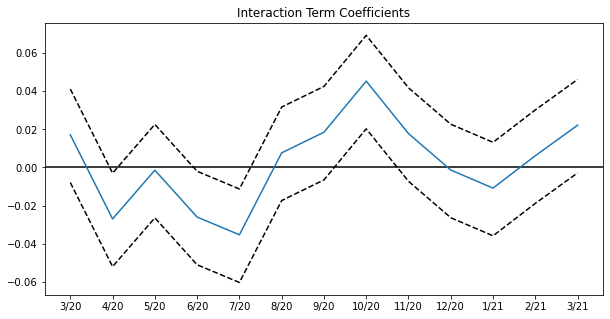

In [213]:
#Graph the Coefficients
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
x = results.params[-13:]
x_plus = x+.024
x_min = x-.025
y = short_names[-13:]
plt.axhline(y=0,c='black')
plt.plot(y,x)
plt.plot(y,x_plus,'--',c='black')
plt.plot(y,x_min,'--',c='black')
plt.title("Interaction Term Coefficients")